In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Embedding,Flatten
from keras.layers import LSTM, Bidirectional
from keras.models import load_model, save_model
from matplotlib import pyplot
from keras.models import Model
from keras.preprocessing.text import text_to_word_sequence
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
from keras.layers import Embedding,Flatten,Conv1D,MaxPooling1D
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import sys
from keras.callbacks import ModelCheckpoint
import time
import datetime
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
dataFrame = pd.read_csv('text_emotion.csv', encoding='utf-8')
dataFrame.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [ ]:
dataFrame['sentiment'] = dataFrame['sentiment'].replace('hate','anger')

In [ ]:
n1 = dataFrame['sentiment'] == 'happiness'
n2 = dataFrame['sentiment'] == 'neutral'
n3 = dataFrame['sentiment'] == 'sadness'
n4 = dataFrame['sentiment'] == 'anger'
n5 = dataFrame['sentiment'] == 'worry'
n6 = dataFrame['sentiment'] == 'relief'
dataFrame = dataFrame[n1 | n2 | n3 | n4 | n5 | n6]

In [ ]:
x = dataFrame.values[:,3]
y = dataFrame.values[:,1]

In [ ]:
stop_words = set(stopwords.words('english')) 
new_stop_words=set(stop_words)

# adding woudlnt type of words into stopwords list
for s in stop_words:
	new_stop_words.add(s.replace('\'',''))
	pass
	
stop_words=new_stop_words
print("Excluding stopwords ...")

# removing @ from default base filter, to remove that whole word, which might be considered as user or page name
base_filters='\n\t!"#$%&()*+,-./:;<=>?[\]^_`{|}~ '

word_sequences=[]

for i in x:
	i=str(i)
	i=i.replace('\'', '')
	newlist = [x for x in text_to_word_sequence(i,filters=base_filters, lower=True) if not x.startswith("@")]
	filtered_sentence = [w for w in newlist if not w in stop_words] 
	word_sequences.append(filtered_sentence)
	pass

Excluding stopwords ...


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(word_sequences)
word_indices = tokenizer.texts_to_sequences(word_sequences)
word_index = tokenizer.word_index
print("Tokenized to Word indices as ")
for i in word_indices:
  print(i)
print(word_index)
print(np.array(word_indices).shape)

Streaming output truncated to the last 5000 lines.
[313, 585, 1760, 1044]
[261, 66, 2]
[153, 299, 2307, 1671, 3109, 2058, 3530, 3620, 51, 41]
[47, 27, 115]
[752, 3224, 46, 1105, 18]
[442, 2486, 825, 4, 3956, 921, 223, 596, 343, 8, 82, 20, 24745]
[217, 134, 18, 42, 244, 24746, 491, 108]
[757, 24747]
[3150, 6021, 1588, 1481, 391, 2772, 225, 391]
[203, 24748, 24749, 1498, 1763, 204, 36, 61]
[346, 1961, 43, 145, 567, 66, 2]
[53, 22, 1, 188, 140, 40, 63, 15, 6277]
[5, 261, 5190]
[896, 2362, 1002, 112, 840, 807, 143, 74, 14, 1339, 67, 294, 2123]
[47, 10635, 138, 9, 125, 28, 42, 538, 604, 81, 42, 474]
[144, 2871, 3124, 65, 10, 1124, 24750, 381, 173, 343]
[24751, 27, 149]
[24, 760, 1203, 24, 45, 3]
[2183, 135, 1507, 590, 75, 1901, 992, 146, 24752, 8713, 10, 57]
[13, 111, 722, 43, 49, 808, 4, 1419, 1, 28]
[89, 208, 37, 56, 10518, 138, 3563, 230, 303]
[94, 747, 479, 1339]
[513, 69, 6, 358, 263, 47, 5740, 24753, 5740, 4021]
[506, 1715, 14, 1021]
[280, 34]
[80, 941, 9104, 1044, 3632, 24754]
[9, 63

In [ ]:
MAX_SEQUENCE_LENGTH = 20
#padding word_indices
x_data=pad_sequences(word_indices,maxlen=MAX_SEQUENCE_LENGTH)
print("After padding data")
for i in x_data:
  print(i)
print(x_data.shape)

Streaming output truncated to the last 5000 lines.
[   0    0    0    0    0    0    0    0    0    0   41 1291  153  299
  729  261   28   66    2  380]
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0   168    78 26020    65   211]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0 1243]
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     8    82    20 26021]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
   96   38  166   45  757 1905]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
  188   10  651  635  148 4986]
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0 26022 26023 26024 26025   261 26026]
[   0    0    0    0    0    0    0  592    2  145   32   63   61  342
   28  572 1806   36   17  273]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0 362   3 

In [ ]:
EMBEDDING_DIM = 50
# using pretrained glove vector
print("Loading Glove Vectors ...")

embeddings_index = {}
f = open('glove.6B.50d.txt','r',encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Loaded GloVe Vectors Successfully')

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

print("Embedding Matrix Generated : ",embedding_matrix.shape)

embedding_layer = Embedding(len(word_index) + 1,EMBEDDING_DIM, weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)

Loading Glove Vectors ...
Loaded GloVe Vectors Successfully
Embedding Matrix Generated :  (27628, 50)


In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
le_name_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print("Label Encoding Classes as ")
print(le_name_mapping)

y_data=np_utils.to_categorical(integer_encoded)
print("One Hot Encoded class shape ")
print(y_data.shape)

Label Encoding Classes as 
{0: 'anger', 1: 'happiness', 2: 'neutral', 3: 'relief', 4: 'sadness', 5: 'worry'}
One Hot Encoded class shape 
(30430, 6)


In [ ]:
model = Sequential()
# First layer in our model is embedding layer converts each input of size 20 to (20,50) aka convert each word into vector of 50
model.add(embedding_layer)
# one hidden layer of one dimension convolution neural network
# It will convert vector of 50 into 30 using convolution
model.add(Conv1D(30,1,activation="relu"))
# We are adding a layer of max pooling 
model.add(MaxPooling1D(2))
# We will get a output of 10,30 
# We are taking 100 lstm cells with return sequences two 
model.add(LSTM(100,return_sequences = True))
# We are flattening it 
model.add(Flatten())
# Adding a neutral network of 500 neurons
model.add(Dense(500,activation='relu'))
# Adding another layer of neutral network of 300 neurons
model.add(Dense(300,activation='relu'))
# Adding activation layer 
model.add(Dense(y_data.shape[1],activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
print(model.summary())

print("Finished Preprocessing data ...")
print("x_data shape : ",x_data.shape)
print("y_data shape : ",y_data.shape)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 50)            1381400   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 20, 30)            1530      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 100)           52400     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_7 (Dense)              (None, 300)              

In [ ]:
print("spliting data into training, testing set")
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data)


batch_size = 64
num_epochs = 100
x_valid, y_valid = x_train[:batch_size], y_train[:batch_size]
x_train2, y_train2 = x_train[batch_size:], y_train[batch_size:]


st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')

spliting data into training, testing set


Epoch 1/100
356/356 [==============================] - 9s 26ms/step - loss: 1.6513 - accuracy: 0.3171 - val_loss: 1.6437 - val_accuracy: 0.2812
Epoch 2/100
356/356 [==============================] - 9s 25ms/step - loss: 1.6017 - accuracy: 0.3313 - val_loss: 1.6322 - val_accuracy: 0.2812
Epoch 3/100
356/356 [==============================] - 9s 25ms/step - loss: 1.5907 - accuracy: 0.3350 - val_loss: 1.6152 - val_accuracy: 0.3125
Epoch 4/100
356/356 [==============================] - 9s 24ms/step - loss: 1.5820 - accuracy: 0.3401 - val_loss: 1.6088 - val_accuracy: 0.2812
Epoch 5/100
356/356 [==============================] - 8s 24ms/step - loss: 1.5735 - accuracy: 0.3478 - val_loss: 1.6013 - val_accuracy: 0.2812
Epoch 6/100
356/356 [==============================] - 9s 24ms/step - loss: 1.5640 - accuracy: 0.3510 - val_loss: 1.5910 - val_accuracy: 0.3281
Epoch 7/100
356/356 [==============================] - 9s 24ms/step - loss: 1.5535 - accuracy: 0.3585 - val_loss: 1.5780 - val_accuracy:

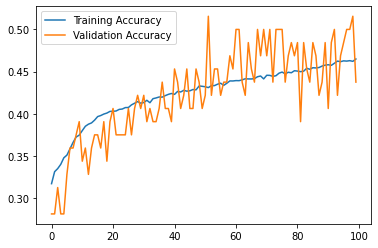

In [ ]:
filepath = 'model_weights-improvement-{epoch:02d}-{val_accuracy:.6f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(x_train2, y_train2, validation_data=(x_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

scores = model.evaluate(x_test, y_test, verbose=0)

model.save('')
pyplot.plot(history.history['accuracy'],label='Training Accuracy')
pyplot.plot(history.history['val_accuracy'],label='Validation Accuracy')

pyplot.legend()
pyplot.show()

In [ ]:
print(scores)

[1.4400063753128052, 0.42060989141464233]


In [ ]:
model = load_model('./')

In [ ]:
import tweepy
import csv
import pandas as pd
####input your credentials here
consumer_key = 'v8GaHcluC0rtopyfWDAiUJGnt'
consumer_secret = '979suEeylfPDFMt3H8sI9AQAwJ5pFbjUKJ5978vEyqUuUx18CR'
access_token = '3247727521-nRo1mbzFhC2CPQjy30QcGicmRbHvK48B3SYTqVp'
access_token_secret = 'aZb7H6e3Kcqt9TJJoxrzY6uTqjsb5kaQr2M9CETPLoKou'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)
students_data = []
for tweet in tweepy.Cursor(api.search,q=["#student"],count=1000,lang="en",since="2020-06-01").items():
    students_data.append(tweet.text)
    print(tweet.text)

Streaming output truncated to the last 5000 lines.
RT @BestTutor2020: Get in touch with me for quality papers Pay experts to write your paper!
Timely delivery
#Pay essay
#homework
#discussio…
https://t.co/rjB8d4CypI Art Of Concrete Genie 9781506713427 #ArtOfConcreteGenie #Art_Of_Concrete_Genie #student… https://t.co/hK44bMEvpt
RT @hintondm: @LTHEchat A4 Remembering that we are doing our best and are weighing up all the different factors but always keeping the #hum…
@LTHEchat A4 Remembering that we are doing our best and are weighing up all the different factors but always keepin… https://t.co/NTtP7gnHit
Virtual School✔ Table Read✔ Happy Monday everyone 😊📓📚✏🎭  #moneymakingmonday #virtuallearning #2020 #abcnetwork… https://t.co/TYLMgKSKwW
At Elkamy we provide a safe place for you to find other students, discounts and offers, seek help and advice and mo… https://t.co/ofjCRg3FB0
@PCCLancer I think you're right! Thank you for your vote of confidence! #student #actor #PCCLancer
RT @K12Prospe

In [ ]:
print(len(students_data))

4489
